In [1]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,  roc_curve, auc,precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
import matplotlib.ticker as ticker

In [10]:
# loading the datasets
tracks_data = pd.read_csv('tracks.csv')
artists_data = pd.read_csv('artists_data.csv')
pd.set_option('display.float_format', lambda x: f'{x:.2f}')

In [11]:
# Checking NaN values
tracks_data.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [12]:
# Checking NaN values
artists_data.isna().sum()

Unnamed: 0     0
id             0
followers     13
name           3
popularity     0
dtype: int64

In [14]:
# Renaming columns in tracks_data
tracks_data = tracks_data.rename(columns={'name': 'track_name', 'popularity': 'track_popularity'})

In [15]:
# Displaying the tracks_data details
tracks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   track_name        586601 non-null  object 
 2   track_popularity  586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [16]:
artists_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Unnamed: 0  1104349 non-null  int64  
 1   id          1104349 non-null  object 
 2   followers   1104336 non-null  float64
 3   name        1104346 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 42.1+ MB


In [17]:
# Renaming columns in artist's data
artists_data = artists_data.rename(columns={'id': 'id_artists','name': 'artists_name', 'popularity': 'artists_popularity'})

In [18]:
# Formating the artist's id in tracks_data
tracks_data['id_artists'] = tracks_data['id_artists'].str.replace("\['", "").str.replace("\']","").str.replace("'","")
tracks_data['id_artists'] = tracks_data['id_artists'].str.replace('[', '')
tracks_data['id_artists']= tracks_data['id_artists'].str.split(',').str[0]

In [19]:
# Displaying top 10 rows of tracks_data
tracks_data.head(10)

,id,track_name,track_popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.65,0.45,0,-13.34,1,0.45,0.67,0.74,0.15,0.13,104.85,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.69,0.26,0,-22.14,1,0.96,0.80,0.00,0.15,0.66,102.01,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.43,0.18,1,-21.18,1,0.05,0.99,0.02,0.21,0.46,130.42,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.32,0.09,7,-27.96,1,0.05,0.99,0.92,0.10,0.40,169.98,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.40,0.16,3,-16.90,0,0.04,0.99,0.13,0.31,0.20,103.22,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.23,0.26,5,-12.34,1,0.04,0.99,0.25,0.10,0.05,118.89,4
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],2nuMRGzeJ5jJEKlfS7rZ0W,1922,0.51,0.35,4,-12.83,1,0.12,0.96,0.00,0.15,0.73,85.75,5
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],4AxgXfD7ISvJSTObqm4aIE,1922,0.56,0.18,4,-13.76,1,0.05,0.99,0.00,0.33,0.65,133.09,3
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],5nWlsH5RDgFuRAiDeOFVmf,1922,0.49,0.47,0,-16.22,0,0.04,0.62,0.01,0.11,0.54,139.95,4
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-29,0.55,0.04,6,-23.23,1,0.15,1.00,0.93,0.15,0.61,75.59,3


In [20]:
# Merging the datasets on artist's id
df_artists_tracks = tracks_data.merge(artists_data, how='left', left_on='id_artists', right_on='id_artists', validate='many_to_one')
df_artists_tracks.head(10)

,id,track_name,track_popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,Unnamed: 0,followers,artists_name,artists_popularity
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.65,0.45,...,0.67,0.74,0.15,0.13,104.85,3,129763.00,91.00,Uli,4.00
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.69,0.26,...,0.80,0.00,0.15,0.66,102.01,1,129760.00,3.00,Fernando Pessoa,0.00
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.43,0.18,...,0.99,0.02,0.21,0.46,130.42,5,133256.00,3528.00,Ignacio Corsini,23.00
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.32,0.09,...,0.99,0.92,0.10,0.40,169.98,3,133256.00,3528.00,Ignacio Corsini,23.00
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.40,0.16,...,0.99,0.13,0.31,0.20,103.22,4,137360.00,11327.00,Dick Haymes,35.00
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922,0.23,0.26,...,0.99,0.25,0.10,0.05,118.89,4,137360.00,11327.00,Dick Haymes,35.00
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],2nuMRGzeJ5jJEKlfS7rZ0W,1922,0.51,0.35,...,0.96,0.00,0.15,0.73,85.75,5,129761.00,15.00,Francis Marty,0.00
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],4AxgXfD7ISvJSTObqm4aIE,1922,0.56,0.18,...,0.99,0.00,0.33,0.65,133.09,3,135832.00,5078.00,Mistinguett,22.00
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],5nWlsH5RDgFuRAiDeOFVmf,1922,0.49,0.47,...,0.62,0.01,0.11,0.54,139.95,4,129768.00,11.00,Greg Fieler,0.00
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-29,0.55,0.04,...,1.00,0.93,0.15,0.61,75.59,3,133256.00,3528.00,Ignacio Corsini,23.00


In [21]:
df_artists_tracks.isna().sum()

id                        0
track_name               71
track_popularity          0
duration_ms               0
explicit                  0
artists                   0
id_artists                0
release_date              0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
Unnamed: 0            12415
followers             12416
artists_name          12415
artists_popularity    12415
dtype: int64

In [22]:
# Dropping irrelevant columns
df_artists_tracks.drop(['id', 'id_artists', 'release_date', 'explicit','Unnamed: 0'], axis=1, inplace=True)

In [23]:
df_artists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   track_name          586601 non-null  object 
 1   track_popularity    586672 non-null  int64  
 2   duration_ms         586672 non-null  int64  
 3   artists             586672 non-null  object 
 4   danceability        586672 non-null  float64
 5   energy              586672 non-null  float64
 6   key                 586672 non-null  int64  
 7   loudness            586672 non-null  float64
 8   mode                586672 non-null  int64  
 9   speechiness         586672 non-null  float64
 10  acousticness        586672 non-null  float64
 11  instrumentalness    586672 non-null  float64
 12  liveness            586672 non-null  float64
 13  valence             586672 non-null  float64
 14  tempo               586672 non-null  float64
 15  time_signature      586672 non-nul

In [24]:
# Checking for duplicate row
df_artists_tracks.duplicated().sum()

2262

In [26]:
# Dropping track_name is not highly relevant
df_artists_tracks.drop(['track_name'], inplace=True, axis=1)

In [28]:
df_artists_tracks.isna().sum()

track_popularity          0
duration_ms               0
artists                   0
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
followers             12416
artists_name          12415
artists_popularity    12415
dtype: int64

In [29]:
# Removing the rows where artist_name is empty
df_artists_tracks.dropna(subset=['artists_name'], inplace=True)

In [30]:
df_artists_tracks.isna().sum()

track_popularity      0
duration_ms           0
artists               0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             1
artists_name          0
artists_popularity    0
dtype: int64

In [31]:
df_artists_tracks.dropna(subset=['followers'], inplace=True)

In [35]:
df_artists_tracks.drop(['artists'], inplace=True, axis=1)

In [36]:
df_artists_tracks.isna().sum()

track_popularity      0
duration_ms           0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
artists_name          0
artists_popularity    0
dtype: int64

<Axes: >

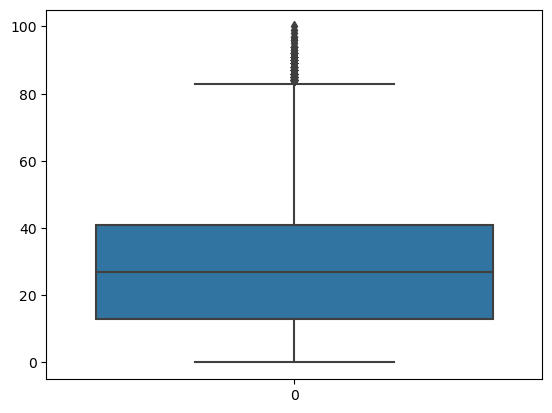

In [37]:
# Not data is clead, we will now check for outliers
# Using box plot for finding outliers
sns.boxplot(df_artists_tracks['track_popularity']) #target variable

<Axes: xlabel='danceability'>

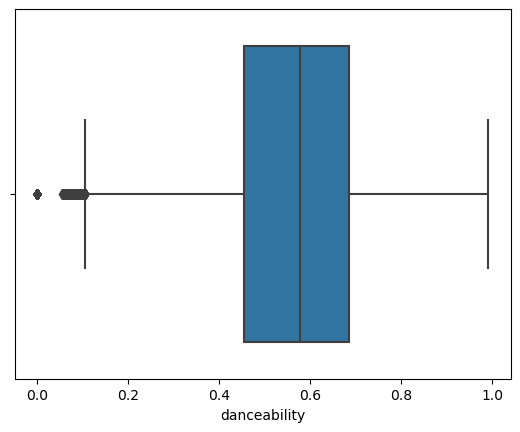

In [38]:
sns.boxplot(x=df_artists_tracks['danceability'])

In [39]:
# removing outliers from danceability
q1 = df_artists_tracks['danceability'].quantile(0.25)
q3 = df_artists_tracks['danceability'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(0.10499999999999993, 1.0330000000000001)

In [42]:
lower_bound = max(lower_bound, 0)
df_artists_tracks = df_artists_tracks[(df_artists_tracks['danceability'] >= lower_bound) & (df_artists_tracks['danceability'] <= upper_bound)]

<Axes: xlabel='danceability'>

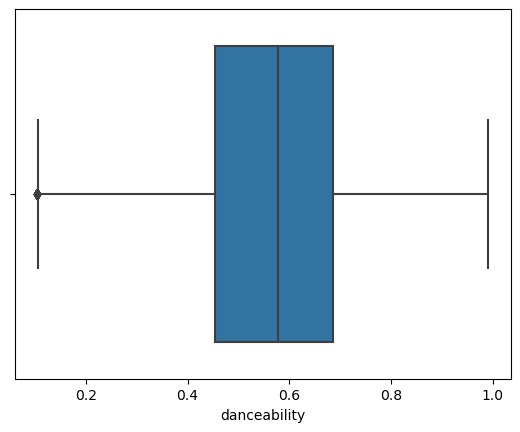

In [43]:
sns.boxplot(x=df_artists_tracks['danceability'])

<Axes: xlabel='loudness'>

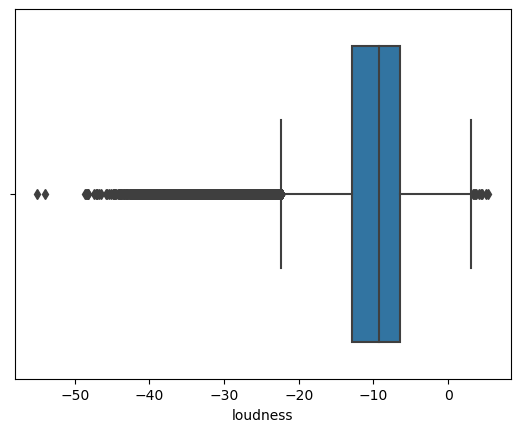

In [44]:
sns.boxplot(x=df_artists_tracks['loudness'])

In [45]:
# removing outliers from loudness
q1 = df_artists_tracks['loudness'].quantile(0.25)
q3 = df_artists_tracks['loudness'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(-22.430500000000002, 3.1095000000000006)

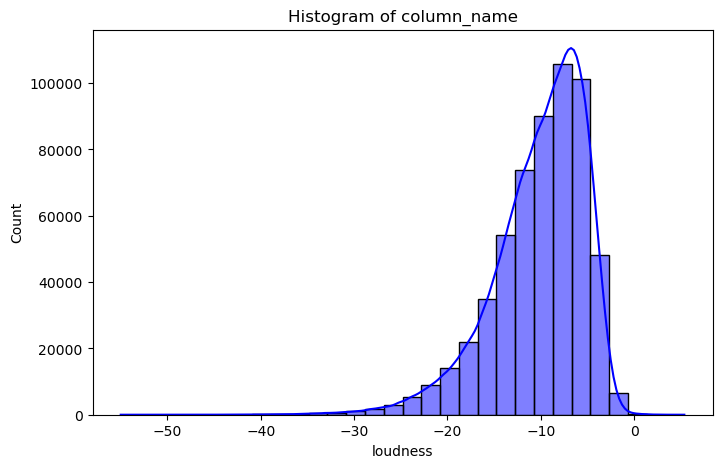

In [46]:
#checking data is sckewed or not
plt.figure(figsize=(8, 5))
sns.histplot(df_artists_tracks['loudness'], bins=30, kde=True, color='blue')
plt.title('Histogram of column_name')
plt.show()

In [47]:
df_artists_tracks = df_artists_tracks[(df_artists_tracks['loudness'] >= lower_bound) & (df_artists_tracks['loudness'] <= upper_bound)]

<Axes: xlabel='loudness'>

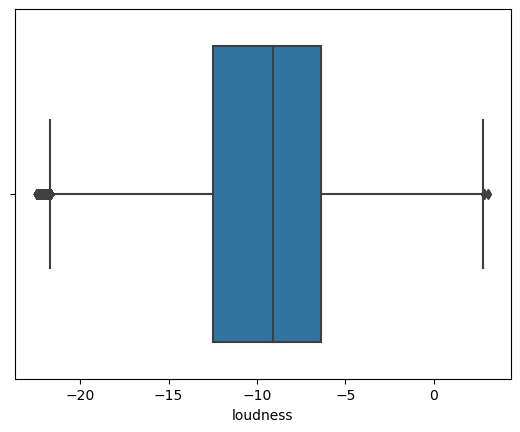

In [48]:
sns.boxplot(x=df_artists_tracks['loudness'])

<Axes: xlabel='speechiness'>

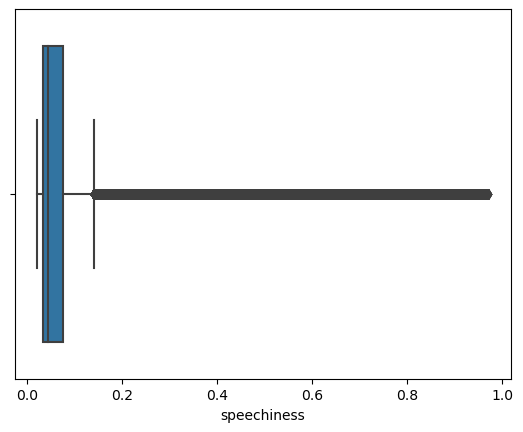

In [49]:
sns.boxplot(x=df_artists_tracks['speechiness'])

In [107]:
# removing outliers from speechiness
q1 = df_artists_tracks['speechiness'].quantile(0.25)
q3 = df_artists_tracks['speechiness'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1 * iqr)
upper_bound = q3 + (0.9 * iqr)
lower_bound, upper_bound

(0.015899999999999997, 0.05969000000000001)

In [108]:
lower_bound = max(lower_bound, 0)
df_artists_tracks = df_artists_tracks[(df_artists_tracks['speechiness'] >= lower_bound) & (df_artists_tracks['speechiness'] <= upper_bound)]

<Axes: xlabel='speechiness'>

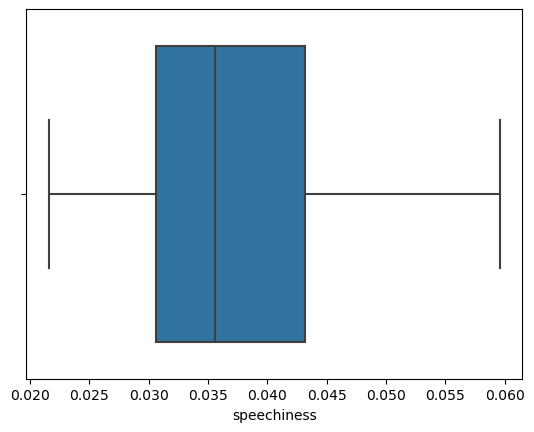

In [109]:
sns.boxplot(x=df_artists_tracks['speechiness'])

<Axes: xlabel='instrumentalness'>

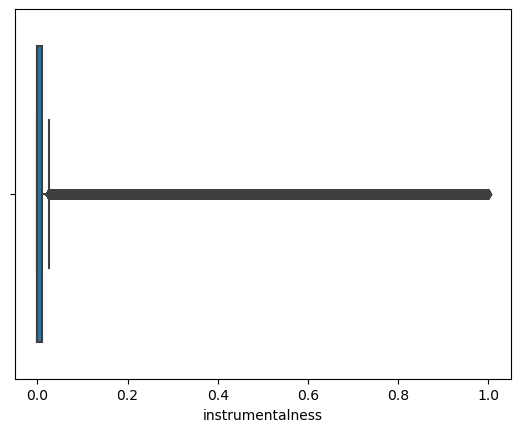

In [53]:
sns.boxplot(x=df_artists_tracks['instrumentalness'])

In [113]:

# removing outliers from instrumentalness
q1 = df_artists_tracks['instrumentalness'].quantile(0.25)
q3 = df_artists_tracks['instrumentalness'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(-4.095e-05, 6.825e-05)

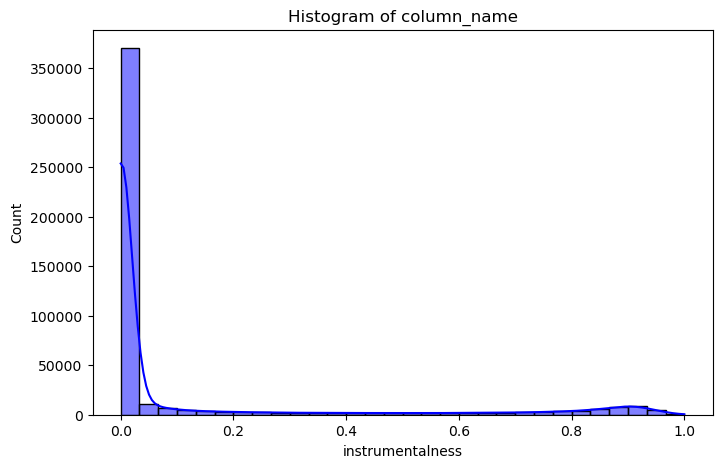

In [56]:
# data is rightly skewed
plt.figure(figsize=(8, 5))
sns.histplot(df_artists_tracks['instrumentalness'], bins=30, kde=True, color='blue')
plt.title('Histogram of column_name')
plt.show()

In [114]:
lower_bound = max(lower_bound, 0)
df_artists_tracks = df_artists_tracks[(df_artists_tracks['instrumentalness'] >= lower_bound) & (df_artists_tracks['instrumentalness'] <= upper_bound)]

<Axes: xlabel='instrumentalness'>

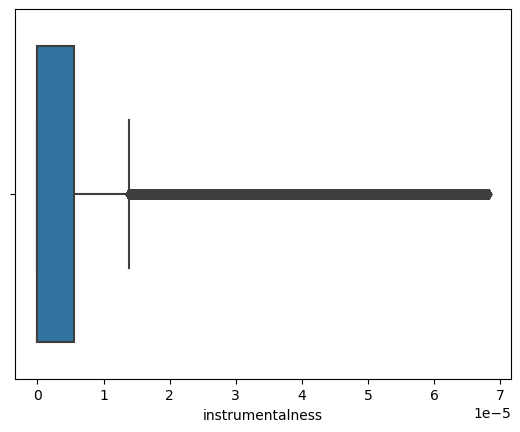

In [115]:
sns.boxplot(x=df_artists_tracks['instrumentalness'])

In [58]:
df_artists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 366634 entries, 2 to 586671
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   track_popularity    366634 non-null  int64  
 1   duration_ms         366634 non-null  int64  
 2   danceability        366634 non-null  float64
 3   energy              366634 non-null  float64
 4   key                 366634 non-null  int64  
 5   loudness            366634 non-null  float64
 6   mode                366634 non-null  int64  
 7   speechiness         366634 non-null  float64
 8   acousticness        366634 non-null  float64
 9   instrumentalness    366634 non-null  float64
 10  liveness            366634 non-null  float64
 11  valence             366634 non-null  float64
 12  tempo               366634 non-null  float64
 13  time_signature      366634 non-null  int64  
 14  followers           366634 non-null  float64
 15  artists_name        366634 non-null  ob

<Axes: xlabel='liveness'>

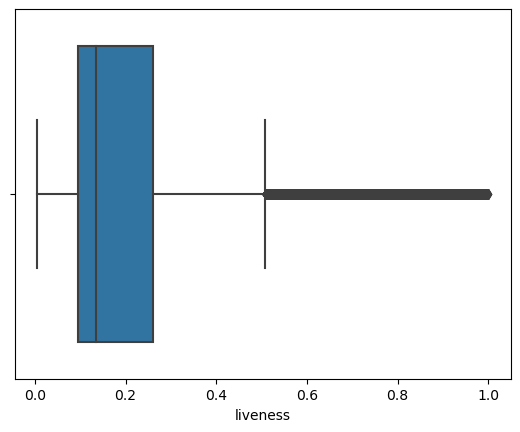

In [59]:
sns.boxplot(x=df_artists_tracks['liveness'])

In [116]:
# removing outliers from liveness
q1 = df_artists_tracks['liveness'].quantile(0.25)
q3 = df_artists_tracks['liveness'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1 * iqr)
upper_bound = q3 + (1* iqr)
lower_bound, upper_bound

(-0.02679999999999999, 0.3374)

In [117]:
lower_bound = max(lower_bound, 0)
df_artists_tracks = df_artists_tracks[(df_artists_tracks['liveness'] >= lower_bound) & (df_artists_tracks['liveness'] <= upper_bound)]

<Axes: xlabel='liveness'>

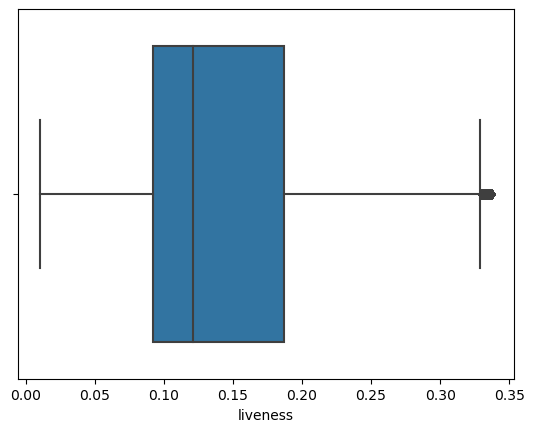

In [118]:
sns.boxplot(x=df_artists_tracks['liveness'])

In [62]:
df_artists_tracks.shape

(336562, 17)

In [63]:
# Doing Label Encoding for artistis name
label_encoder = LabelEncoder()
df_artists_tracks['artists_name'] = label_encoder.fit_transform(df_artists_tracks['artists_name'])

In [64]:
df_artists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336562 entries, 2 to 586671
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   track_popularity    336562 non-null  int64  
 1   duration_ms         336562 non-null  int64  
 2   danceability        336562 non-null  float64
 3   energy              336562 non-null  float64
 4   key                 336562 non-null  int64  
 5   loudness            336562 non-null  float64
 6   mode                336562 non-null  int64  
 7   speechiness         336562 non-null  float64
 8   acousticness        336562 non-null  float64
 9   instrumentalness    336562 non-null  float64
 10  liveness            336562 non-null  float64
 11  valence             336562 non-null  float64
 12  tempo               336562 non-null  float64
 13  time_signature      336562 non-null  int64  
 14  followers           336562 non-null  float64
 15  artists_name        336562 non-null  in

<Axes: xlabel='valence'>

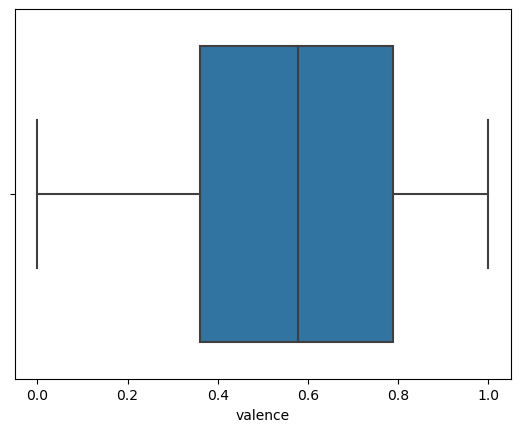

In [65]:
sns.boxplot(x=df_artists_tracks['valence'])

<Axes: xlabel='followers'>

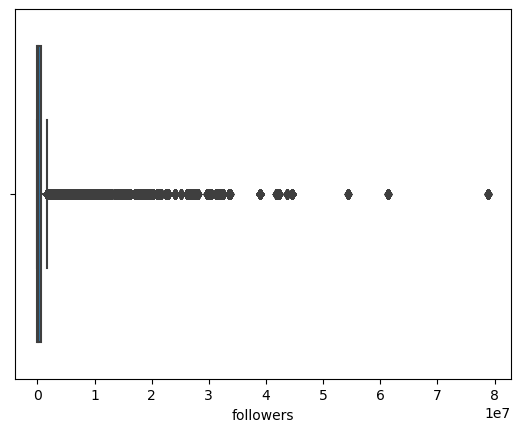

In [67]:
sns.boxplot(x=df_artists_tracks['followers'])

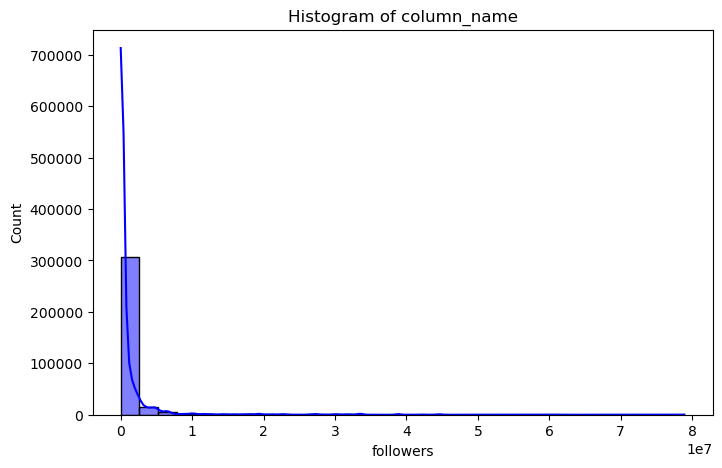

In [68]:
# Checking data 
plt.figure(figsize=(8, 5))
sns.histplot(df_artists_tracks['followers'], bins=30, kde=True, color='blue')
plt.title('Histogram of column_name')
plt.show()

In [69]:
# removing outliers from followers
q1 = df_artists_tracks['followers'].quantile(0.25)
q3 = df_artists_tracks['followers'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1 * iqr)
upper_bound = q3 + (1* iqr)
lower_bound, upper_bound

(-631791.25, 1310856.5)

In [70]:
lower_bound = max(lower_bound, 0)
df_artists_tracks = df_artists_tracks[(df_artists_tracks['followers'] >= lower_bound) & (df_artists_tracks['followers'] <= upper_bound)]

<Axes: xlabel='artists_popularity'>

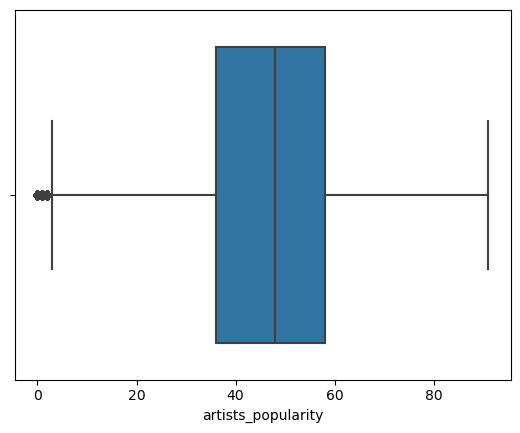

In [71]:
sns.boxplot(x=df_artists_tracks['artists_popularity'])

In [72]:
# removing outliers from artists_popularity
q1 = df_artists_tracks['artists_popularity'].quantile(0.25)
q3 = df_artists_tracks['artists_popularity'].quantile(0.75)
iqr = q3 - q1


lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)
lower_bound, upper_bound

(3.0, 91.0)

In [73]:
df_artists_tracks = df_artists_tracks[(df_artists_tracks['artists_popularity'] >= lower_bound) & (df_artists_tracks['artists_popularity'] <  upper_bound)]

<Axes: xlabel='artists_popularity'>

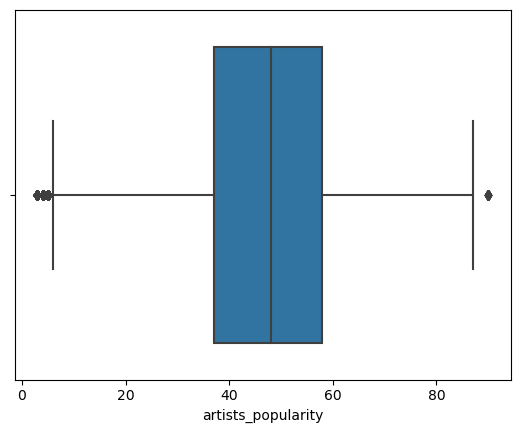

In [74]:
sns.boxplot(x=df_artists_tracks['artists_popularity'])

In [75]:
df_artists_tracks.shape

(277402, 17)

In [86]:
# Checking for duplicate row
df_artists_tracks.duplicated().sum()

0

In [85]:
# Dropping the duplicates
df_artists_tracks.drop_duplicates(inplace=True)

In [78]:
# Setting a threshold of 50 for mapping the track_popularity column if its less than 50 then it is less popular or equal to or greater than 50 will be highly popular
df_artists_tracks.loc[df_artists_tracks['track_popularity'] < 50, 'track_popularity'] = 0 
df_artists_tracks.loc[df_artists_tracks['track_popularity'] >= 50, 'track_popularity'] = 1

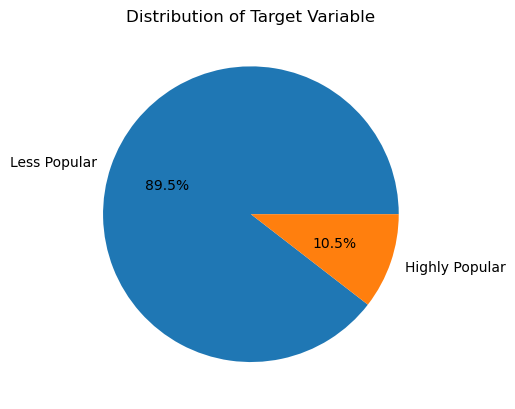

In [87]:
# Showing the track_popularity distribution using Pie Chart
popularity_counts = df_artists_tracks['track_popularity'].value_counts()
labels = ['Less Popular', 'Highly Popular']
plt.pie(popularity_counts, labels=labels, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Target Variable')
plt.show()

## Applying Machine Learning Algorithm (Linear Regression)

In [88]:
LRX = df_artists_tracks.drop(['track_popularity'], axis=1)
LRy = df_artists_tracks['track_popularity']

# Split the data into training and testing sets
LRX_train, LRX_test, LRy_train, LRy_test = train_test_split(LRX, LRy, test_size=0.2, random_state=42)

# Create a SMOTE pipeline with Logistic Regression
LR_smote_lr_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('lr', LogisticRegression(random_state=42))
])

# Fit the SMOTE pipeline on the training data
LR_smote_lr_pipeline.fit(LRX_train, LRy_train)

# Make predictions on the test set
LRy_pred = LR_smote_lr_pipeline.predict(LRX_test)

# Evaluate the model
print("Accuracy:", accuracy_score(LRy_test, LRy_pred))
print("\nClassification Report:\n", classification_report(LRy_test, LRy_pred))
# Evaluate Logistic Regression
print("Logistic Regression:")
print("Precision:", precision_score(LRy_test, LRy_pred))
print("Recall:", recall_score(LRy_test, LRy_pred))
print("F1 Score:", f1_score(LRy_test, LRy_pred))
print("\nClassification Report:\n", classification_report(LRy_test, LRy_pred))

Accuracy: 0.7455241319668059

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84     48652
           1       0.21      0.52      0.30      5695

    accuracy                           0.75     54347
   macro avg       0.57      0.64      0.57     54347
weighted avg       0.86      0.75      0.79     54347

Logistic Regression:
Precision: 0.2100648656354694
Recall: 0.5174714661984197
F1 Score: 0.2988237679983776

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84     48652
           1       0.21      0.52      0.30      5695

    accuracy                           0.75     54347
   macro avg       0.57      0.64      0.57     54347
weighted avg       0.86      0.75      0.79     54347



## Displaying the ROC Curse

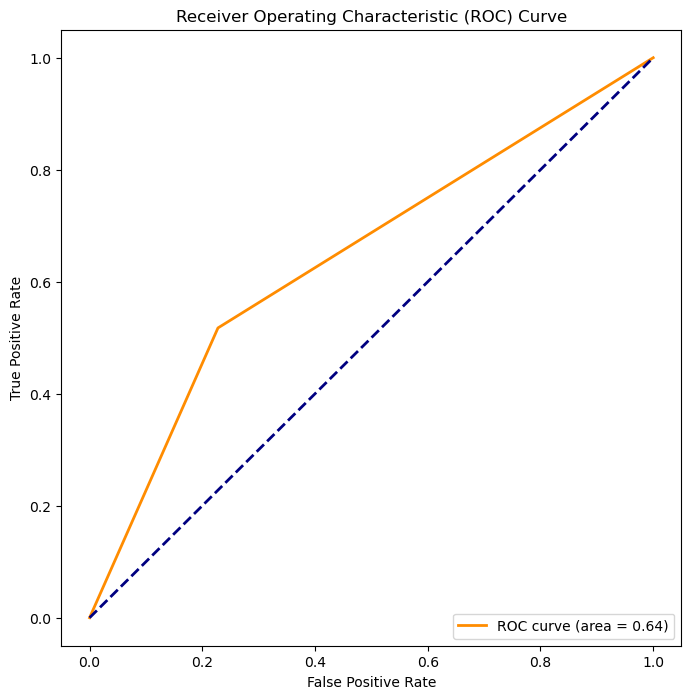

In [89]:
LRfpr, LRtpr, thresholds = roc_curve(LRy_test, LRy_pred)
LRroc_auc = auc(LRfpr, LRtpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(LRfpr, LRtpr, color='darkorange', lw=2, label=f'ROC curve (area = {LRroc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Applying Random Forest

In [93]:
RFX = df_artists_tracks.drop(['track_popularity'],axis=1)
RFy = df_artists_tracks['track_popularity']

# Split the data into training and testing sets
RFX_train, RFX_test, RFy_train, RFy_test = train_test_split(RFX, RFy, test_size=0.2, random_state=42)

# Create a SMOTE pipeline with Random Forest Classifier
RFsmote_rf_pipeline = Pipeline([
    ('smote', SMOTE(sampling_strategy='auto', random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100,random_state=42))
])

# Fit the SMOTE pipeline on the training data
RFsmote_rf_pipeline.fit(RFX_train, RFy_train)

# Make predictions on the test set
RFy_pred = RFsmote_rf_pipeline.predict(RFX_test)

# Evaluate the model result
print("Accuracy:", accuracy_score(RFy_test, RFy_pred))
print("\nRandom Forest:")
print("\nPrecision:", precision_score(RFy_test, RFy_pred))
print("\nRecall:", recall_score(RFy_test, RFy_pred))
print("\nF1 Score:", f1_score(RFy_test, RFy_pred))
print("\nClassification Report:\n", classification_report(RFy_test, RFy_pred))

Accuracy: 0.8578578394391595

Random Forest:

Precision: 0.3627265350284014

Recall: 0.47093942054433713

F1 Score: 0.40980976392390556

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92     48652
           1       0.36      0.47      0.41      5695

    accuracy                           0.86     54347
   macro avg       0.65      0.69      0.66     54347
weighted avg       0.88      0.86      0.87     54347



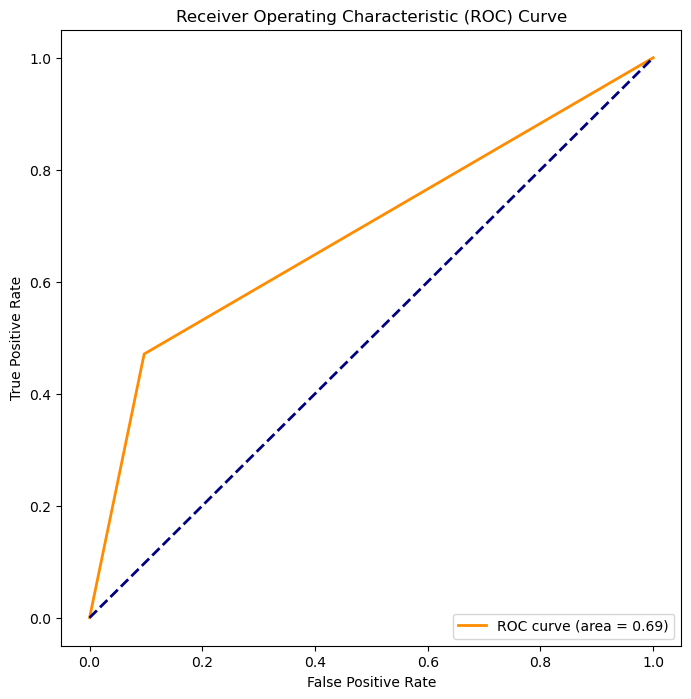

In [94]:
fpr, tpr, thresholds = roc_curve(RFy_test, RFy_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right") 
plt.show()

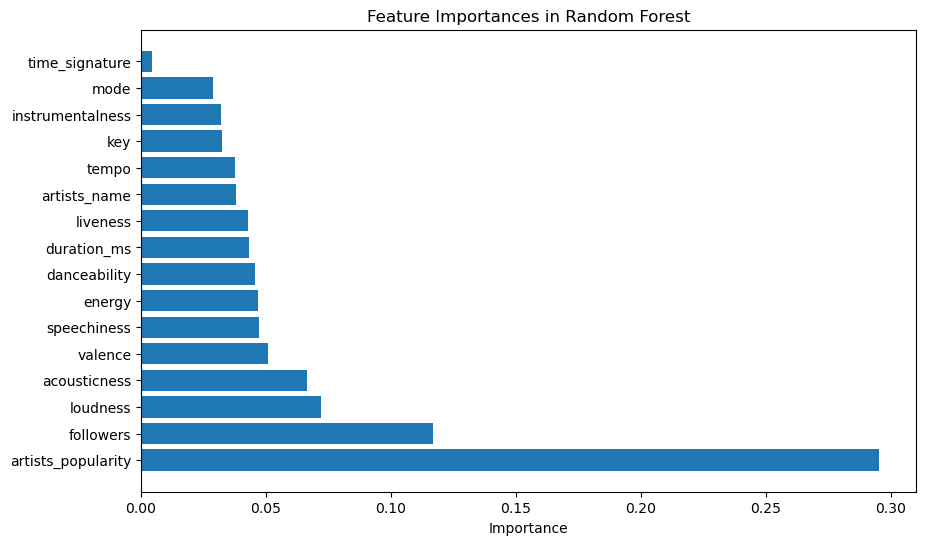

In [95]:
rf_model = RFsmote_rf_pipeline.named_steps['rf']
feature_importances = rf_model.feature_importances_

# Assuming df_merged is your DataFrame
features = df_artists_tracks.drop(['track_popularity'], axis=1).columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances in Random Forest')
plt.show()

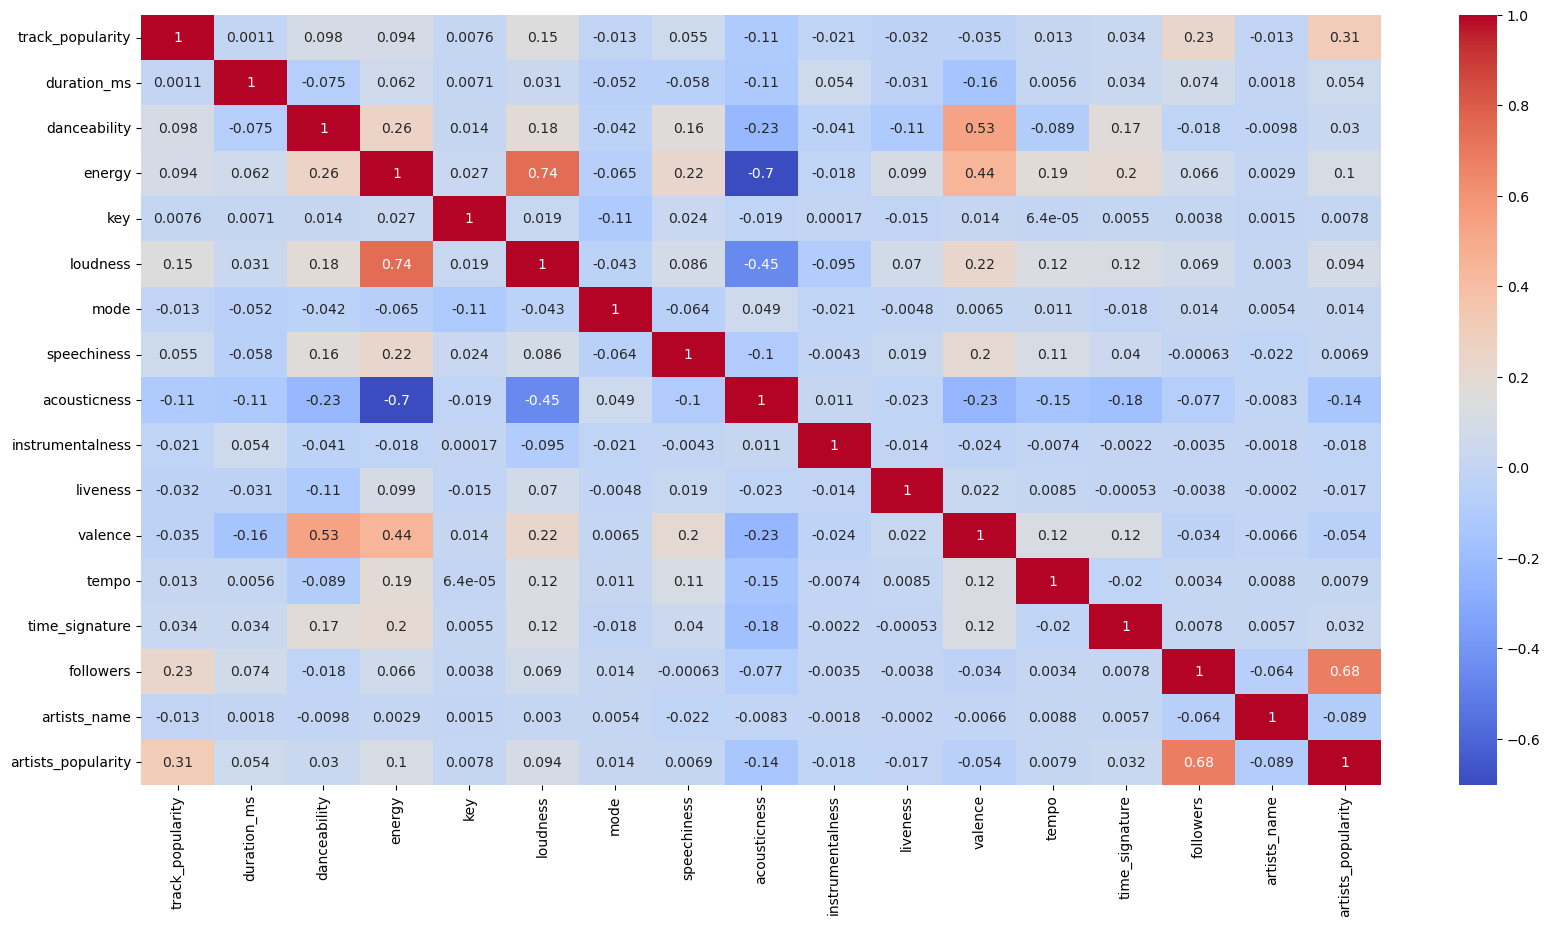

In [103]:
## Displaying correlation heatmap
df_artists_tracks['track_popularity'] = df_artists_tracks['track_popularity'].map({'Highly Popular': 1, 'Less Popular': 0})
plt.figure(figsize=(20, 10))
sns.heatmap(df_artists_tracks.corr(), annot=True, cmap='coolwarm')
plt.show()

## Visual Analysis

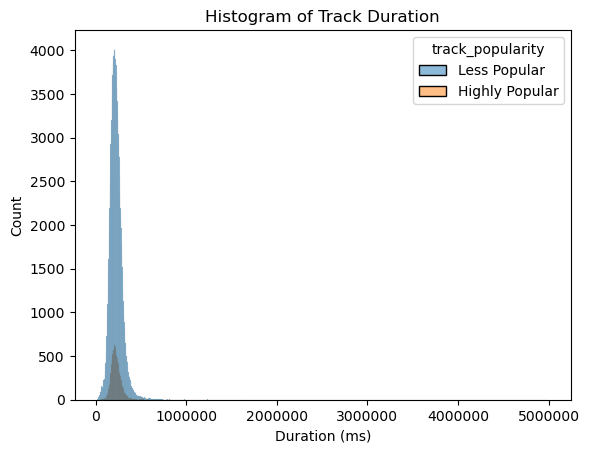

In [97]:
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
df_artists_tracks['track_popularity'] = df_artists_tracks['track_popularity'].map({1: 'Highly Popular', 0: 'Less Popular'})
sns.histplot(data=df_artists_tracks, x='duration_ms', hue='track_popularity')
plt.title('Histogram of Track Duration')
plt.xlabel('Duration (ms)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

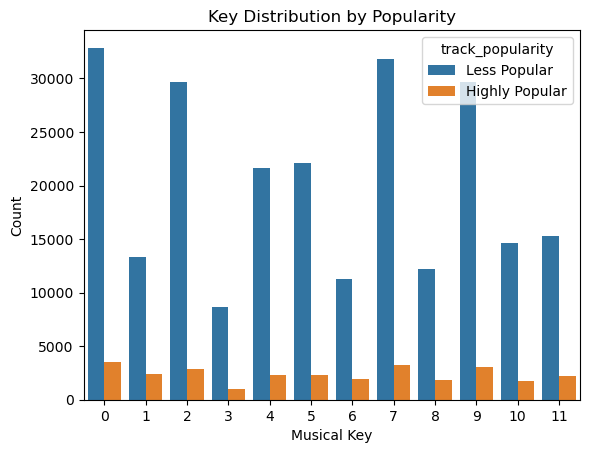

In [98]:
sns.countplot(data=df_artists_tracks, x='key', hue='track_popularity')
plt.title('Key Distribution by Popularity')
plt.xlabel('Musical Key')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

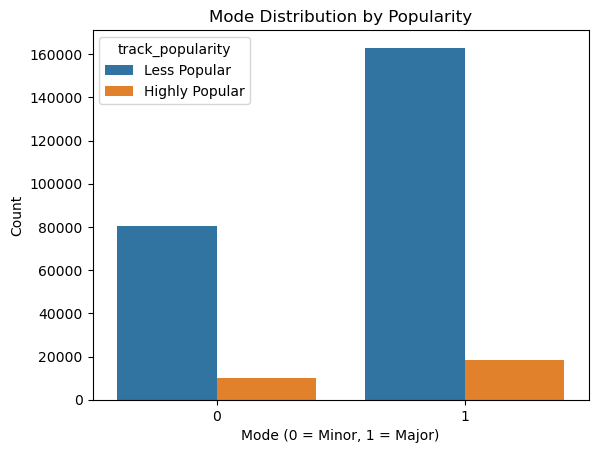

In [99]:
sns.countplot(data=df_artists_tracks, x='mode', hue='track_popularity')
plt.title('Mode Distribution by Popularity')
plt.xlabel('Mode (0 = Minor, 1 = Major)')
plt.ylabel('Count')

Text(0, 0.5, 'Artist Popularity Score')

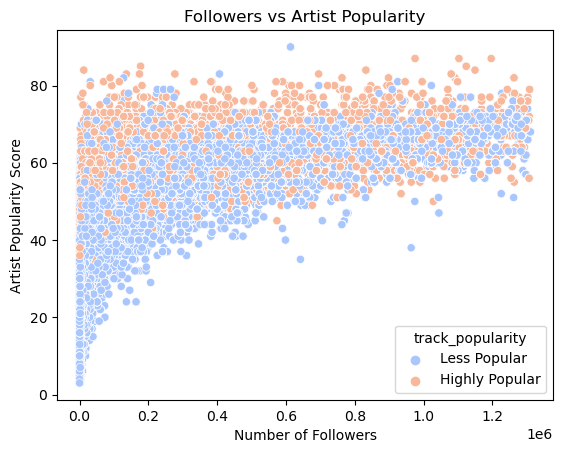

In [100]:
sns.scatterplot(data=df_artists_tracks, x='followers', y='artists_popularity', hue='track_popularity', palette="coolwarm")
plt.title('Followers vs Artist Popularity')
plt.xlabel('Number of Followers')
plt.ylabel('Artist Popularity Score')

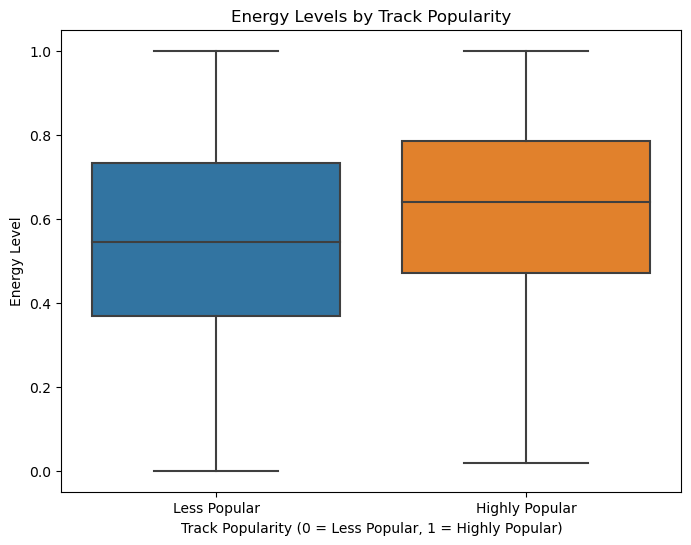

In [101]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='track_popularity', y='energy', data=df_artists_tracks)
plt.title('Energy Levels by Track Popularity')
plt.xlabel('Track Popularity (0 = Less Popular, 1 = Highly Popular)')
plt.ylabel('Energy Level')
plt.show()